In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_datasets.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

1              125
not fire        60
fire            53
fire             4
fire             2
not fire         2
not fire         1
Name: Classes, dtype: int64

In [8]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
243,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
244,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
245,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
246,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1


In [10]:
df['Classes'].value_counts()

1    184
0     63
Name: Classes, dtype: int64

In [11]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
242    1.0
243    1.0
244    1.0
245    1.0
246    1.0
Name: FWI, Length: 247, dtype: float64

In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((185, 11), (62, 11))

In [16]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,0.938412,0.944367,-0.080793,0.982268,0.642126,0.643859,0.605105,0.640741,-0.531291,-0.986991
RH,0.938412,1.000000,0.956292,0.076475,0.896056,0.497774,0.507252,0.400088,0.497638,-0.651414,-0.975149
Ws,0.944367,0.956292,1.000000,0.094249,0.912429,0.561476,0.575493,0.493555,0.563968,-0.602254,-0.967682
Rain,-0.080793,0.076475,0.094249,1.000000,-0.170536,-0.224725,-0.242560,-0.321984,-0.231978,-0.274583,0.000578
FFMC,0.982268,0.896056,0.912429,-0.170536,1.000000,0.699428,0.695973,0.694338,0.697189,-0.406275,-0.959317
DMC,0.642126,0.497774,0.561476,-0.224725,0.699428,1.000000,0.974467,0.837314,0.997079,0.050783,-0.579395
DC,0.643859,0.507252,0.575493,-0.242560,0.695973,0.974467,1.000000,0.806429,0.987903,0.025921,-0.583456
ISI,0.605105,0.400088,0.493555,-0.321984,0.694338,0.837314,0.806429,1.000000,0.833234,0.253670,-0.523598
BUI,0.640741,0.497638,0.563968,-0.231978,0.697189,0.997079,0.987903,0.833234,1.000000,0.049428,-0.578109
Classes,-0.531291,-0.651414,-0.602254,-0.274583,-0.406275,0.050783,0.025921,0.253670,0.049428,1.000000,0.601594


# FEATURE SELECTION

<AxesSubplot: >

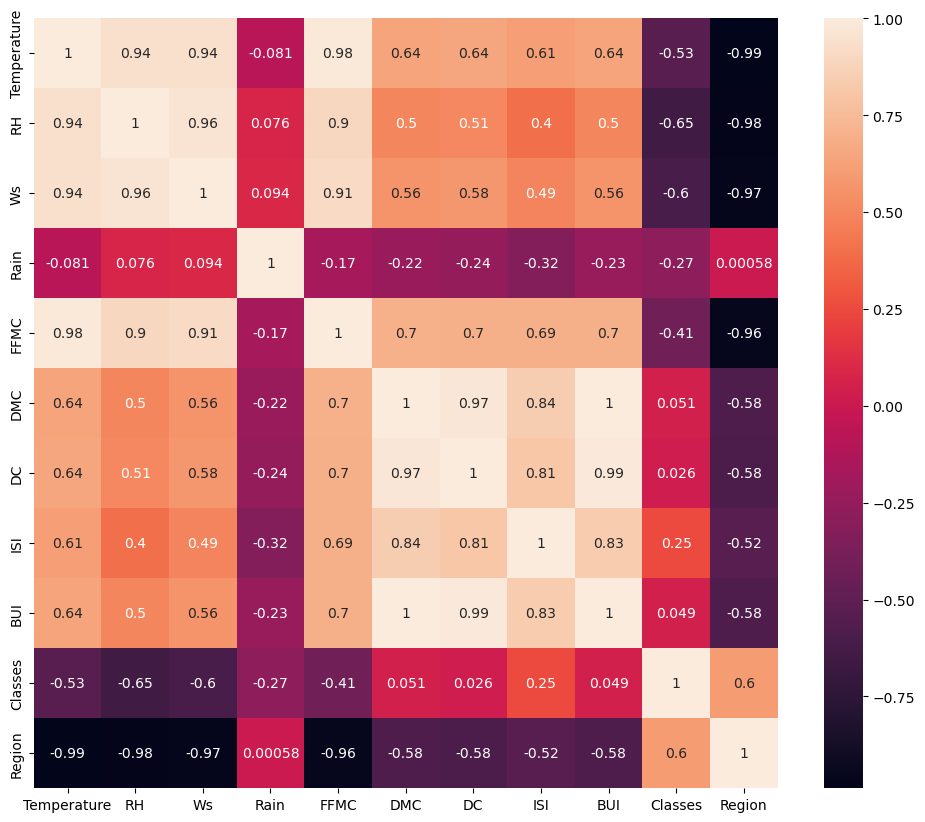

In [17]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [18]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,0.938412,0.944367,-0.080793,0.982268,0.642126,0.643859,0.605105,0.640741,-0.531291,-0.986991
RH,0.938412,1.000000,0.956292,0.076475,0.896056,0.497774,0.507252,0.400088,0.497638,-0.651414,-0.975149
Ws,0.944367,0.956292,1.000000,0.094249,0.912429,0.561476,0.575493,0.493555,0.563968,-0.602254,-0.967682
Rain,-0.080793,0.076475,0.094249,1.000000,-0.170536,-0.224725,-0.242560,-0.321984,-0.231978,-0.274583,0.000578
FFMC,0.982268,0.896056,0.912429,-0.170536,1.000000,0.699428,0.695973,0.694338,0.697189,-0.406275,-0.959317
DMC,0.642126,0.497774,0.561476,-0.224725,0.699428,1.000000,0.974467,0.837314,0.997079,0.050783,-0.579395
DC,0.643859,0.507252,0.575493,-0.242560,0.695973,0.974467,1.000000,0.806429,0.987903,0.025921,-0.583456
ISI,0.605105,0.400088,0.493555,-0.321984,0.694338,0.837314,0.806429,1.000000,0.833234,0.253670,-0.523598
BUI,0.640741,0.497638,0.563968,-0.231978,0.697189,0.997079,0.987903,0.833234,1.000000,0.049428,-0.578109
Classes,-0.531291,-0.651414,-0.602254,-0.274583,-0.406275,0.050783,0.025921,0.253670,0.049428,1.000000,0.601594


In [19]:
def correlation(dataset,threshhold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i][j] > threshhold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [21]:
corr_features

{'BUI', 'DC', 'FFMC', 'RH', 'Ws'}

In [22]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((185, 6), (62, 6))

Feature Scaling or Standardization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 1.12247427e+00,  4.21171025e-01, -4.49475397e-01,
        -6.35109069e-01, -1.68942791e+00, -1.01634986e+00],
       [-9.71113533e-01,  5.68381950e-04, -5.70074307e-01,
        -5.15175236e-01,  5.91916348e-01,  9.83913160e-01],
       [-9.71113533e-01,  5.68381950e-04, -5.70074307e-01,
        -5.15175236e-01,  5.91916348e-01,  9.83913160e-01],
       ...,
       [ 5.99077321e-01,  3.26023887e+00, -5.39924579e-01,
        -8.34998789e-01, -1.68942791e+00, -1.01634986e+00],
       [-9.71113533e-01,  5.68381950e-04, -5.70074307e-01,
        -5.15175236e-01,  5.91916348e-01,  9.83913160e-01],
       [ 9.26200416e-01,  4.21171025e-01, -4.79625124e-01,
        -4.75197292e-01, -1.68942791e+00, -1.01634986e+00]])

## Box Plots To understand Effect Of Standard Scaler

/tmp/ipykernel_77/3871579960.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling')

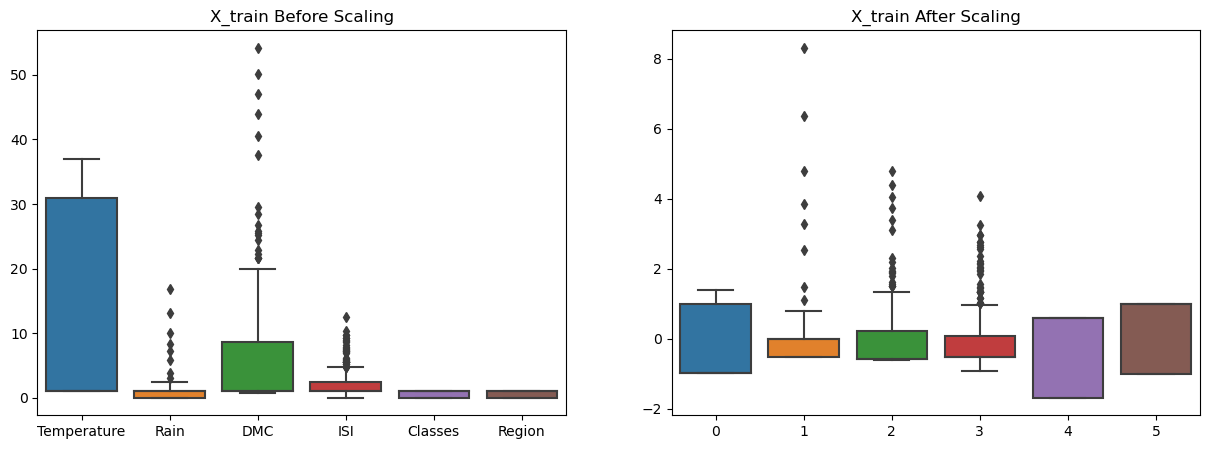

In [33]:
plt.subplots(figsize=(15, 5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)

Mean Absolute Error 0.4051968249924959
R2 Score 0.9786976037082611


 ## Lasso Regression (L1 Regulation) -- Feature Selection

In [36]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)



Mean Absolute Error 0.6999050435454802
R2 Score 0.9278046830617291


## Ridge Regression Model (L2 Regulation ) -- To Reduce the Overfitting

In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)



Mean Absolute Error 0.39998305633478715
R2 Score 0.979518121695595


## Elasticnet Regression -- Both Above

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic= ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)



Mean Absolute Error 0.9396050840824279
R2 Score 0.8922665309333505


## Pickling

In [40]:
## HOW TO MAKE A PICKLE FILE IN FOR THE PERPOSE OF REUSE THESE GIVEN MODELS

In [43]:
import pickle
pickle.dump(scaler,open("Scaler_model.pkl",'wb'))
pickle.dump(ridge,open("Ridge.pkl","wb"))
                        